In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/projects/data_analysis_projects/time series/multiTimeline.csv', skiprows=1)

In [6]:
df.head()

,Month,covid: (Worldwide),lockdown: (Worldwide),hospital: (Worldwide),vaccine: (Worldwide)
0,2004-01,0,<1,15,<1
1,2004-02,<1,<1,16,1
2,2004-03,0,<1,16,1
3,2004-04,<1,<1,16,1
4,2004-05,0,<1,15,1


In [7]:
df.columns = ['week', 'covid19', 'lockdown', 'hospital', 'vaccine']
df.head()

,week,covid19,lockdown,hospital,vaccine
0,2004-01,0,<1,15,<1
1,2004-02,<1,<1,16,1
2,2004-03,0,<1,16,1
3,2004-04,<1,<1,16,1
4,2004-05,0,<1,15,1


In [8]:
df.dtypes

week        object
covid19     object
lockdown    object
hospital     int64
vaccine     object
dtype: object

In [10]:
from datetime import datetime

df['week'] = pd.to_datetime(df.week)

In [11]:
df.dtypes

week        datetime64[ns]
covid19             object
lockdown            object
hospital             int64
vaccine             object
dtype: object

In [12]:
df.set_index('week', inplace=True)

In [13]:
df.head()

,covid19,lockdown,hospital,vaccine
week,,,,
2004-01-01,0,<1,15,<1
2004-02-01,<1,<1,16,1
2004-03-01,0,<1,16,1
2004-04-01,<1,<1,16,1
2004-05-01,0,<1,15,1


In [16]:
df['covid19'] = df['covid19'].replace('<1',0)
df['lockdown'] = df['lockdown'].replace('<1',0)
df['vaccine'] = df['vaccine'].replace('<1',0)

In [17]:
df.head()

,covid19,lockdown,hospital,vaccine
week,,,,
2004-01-01,0,0,15,0
2004-02-01,0,0,16,1
2004-03-01,0,0,16,1
2004-04-01,0,0,16,1
2004-05-01,0,0,15,1


In [18]:
df.dtypes

covid19     object
lockdown    object
hospital     int64
vaccine     object
dtype: object

In [21]:
df['covid19'] = df['covid19'].astype(int)
df['lockdown'] = df['lockdown'].astype(int)
df['vaccine'] = df['vaccine'].astype(int)

In [22]:
df.dtypes

covid19     int64
lockdown    int64
hospital    int64
vaccine     int64
dtype: object

Text(0.5, 0, 'Year')

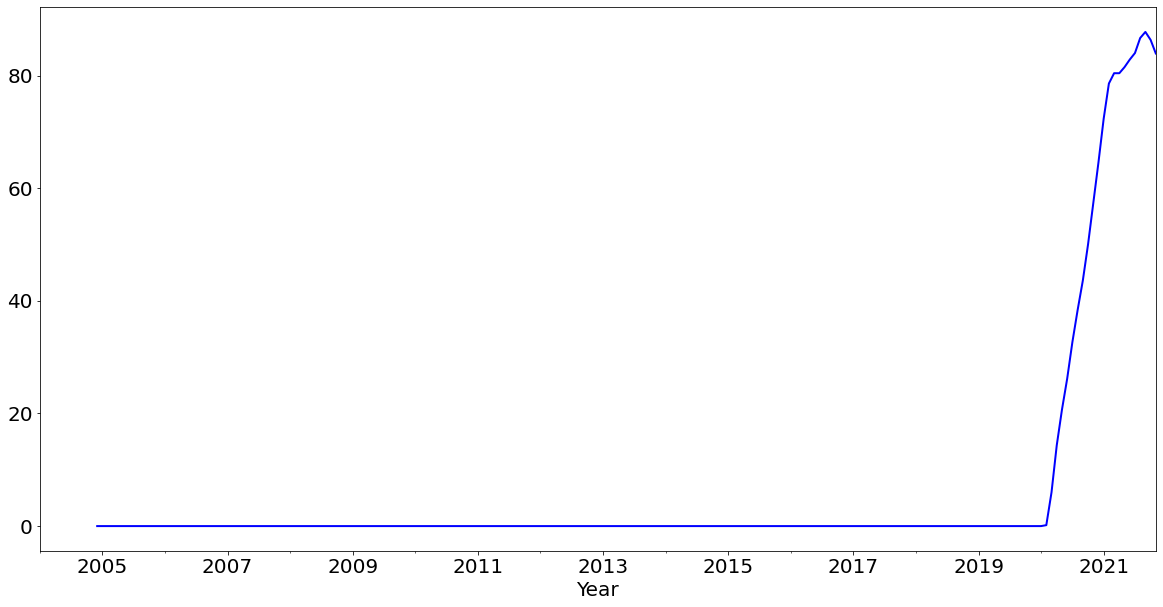

In [25]:
covid = df['covid19']
covid.rolling(12).mean().plot(figsize=(20,10),linewidth=2,fontsize=20,color='blue')
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

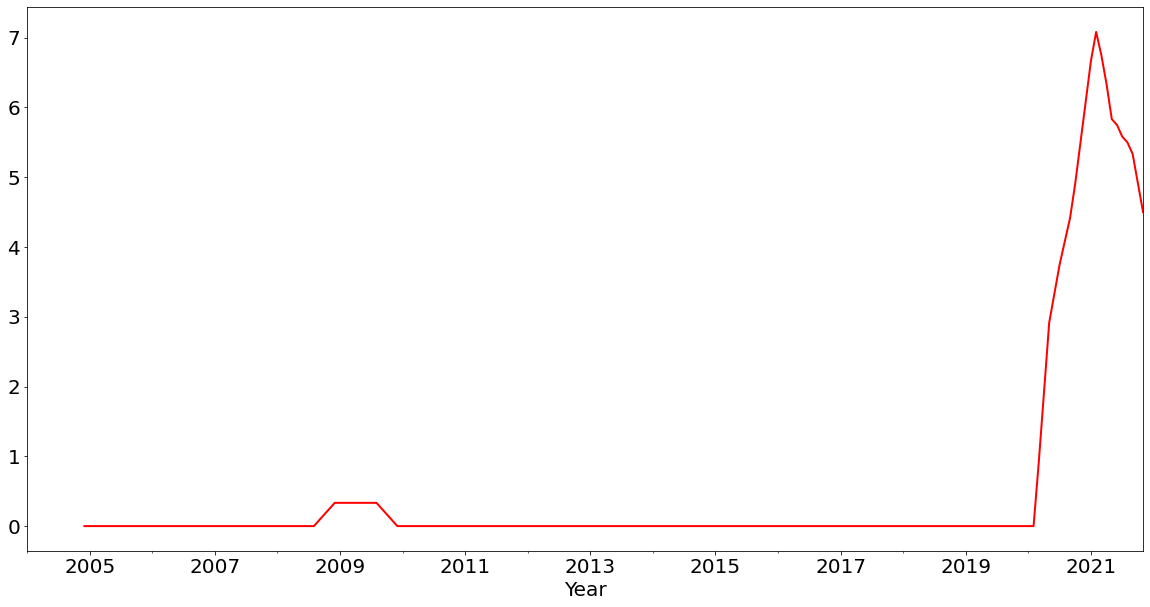

In [26]:
lockdown = df['lockdown']
lockdown.rolling(12).mean().plot(figsize=(20,10),linewidth=2,fontsize=20,color='red')
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

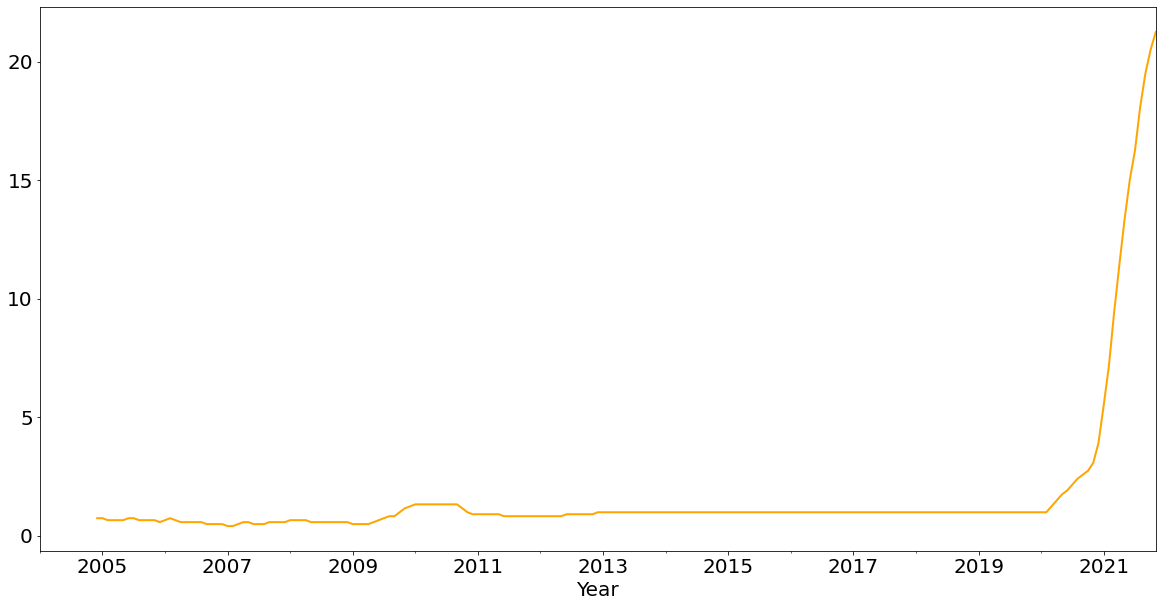

In [27]:
vaccine = df['vaccine']
vaccine.rolling(12).mean().plot(figsize=(20,10),linewidth=2,fontsize=20,color='orange')
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

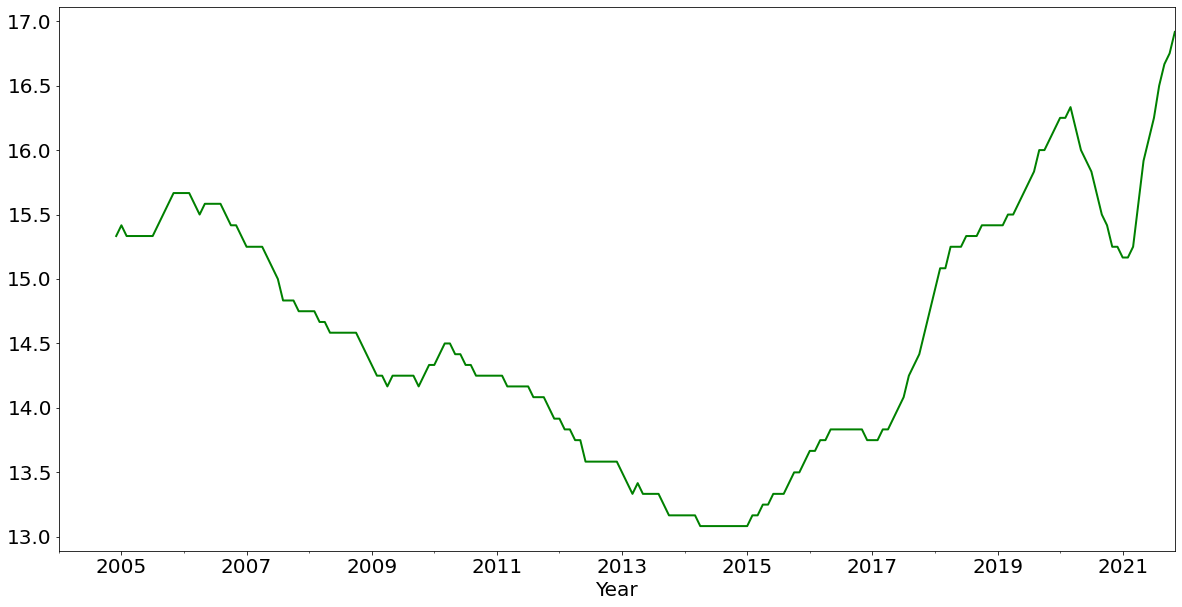

In [28]:
hospital = df['hospital']
hospital.rolling(12).mean().plot(figsize=(20,10),linewidth=2,fontsize=20,color='green')
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

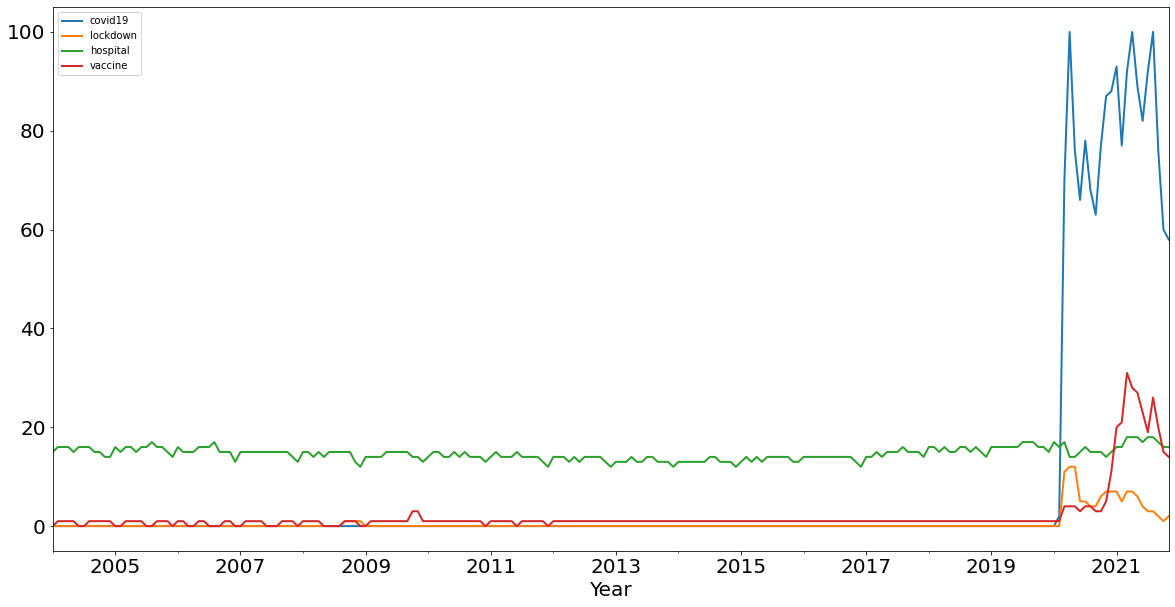

In [30]:
df.plot(figsize=(20,10),linewidth=2,fontsize=20)
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

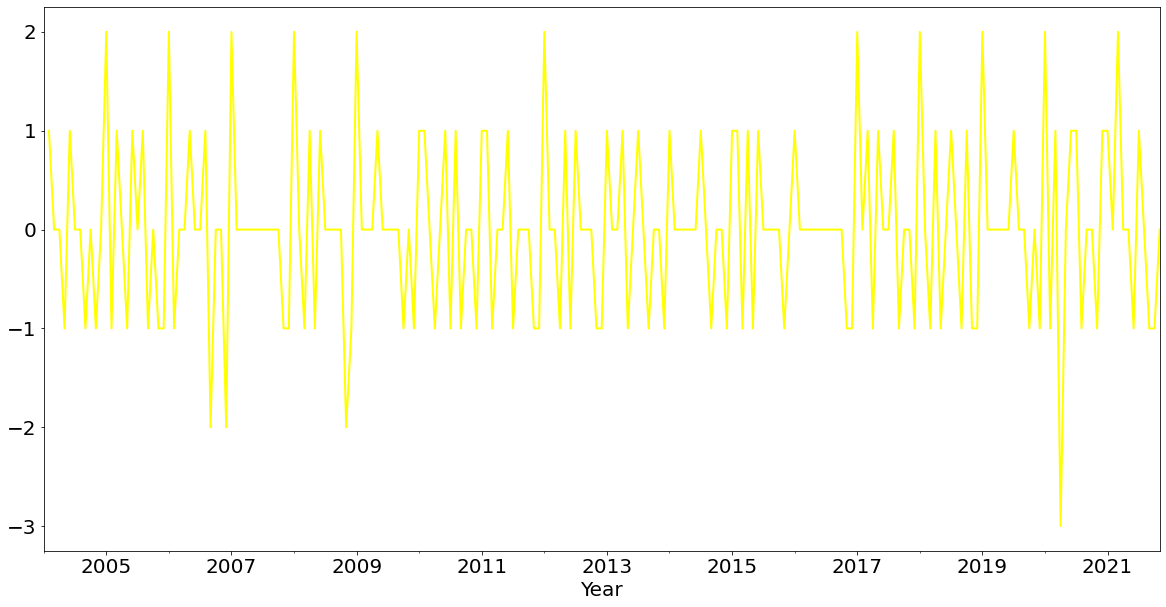

In [32]:
hospital.diff().plot(figsize=(20,10),linewidth=2,fontsize=20,color='yellow')
plt.xlabel('Year',fontsize=20)

In [33]:
df.corr()

,covid19,lockdown,hospital,vaccine
covid19,1.000000,0.888165,0.393722,0.821116
lockdown,0.888165,1.000000,0.267046,0.588307
hospital,0.393722,0.267046,1.000000,0.463714
vaccine,0.821116,0.588307,0.463714,1.000000


Text(0.5, 0, 'Year')

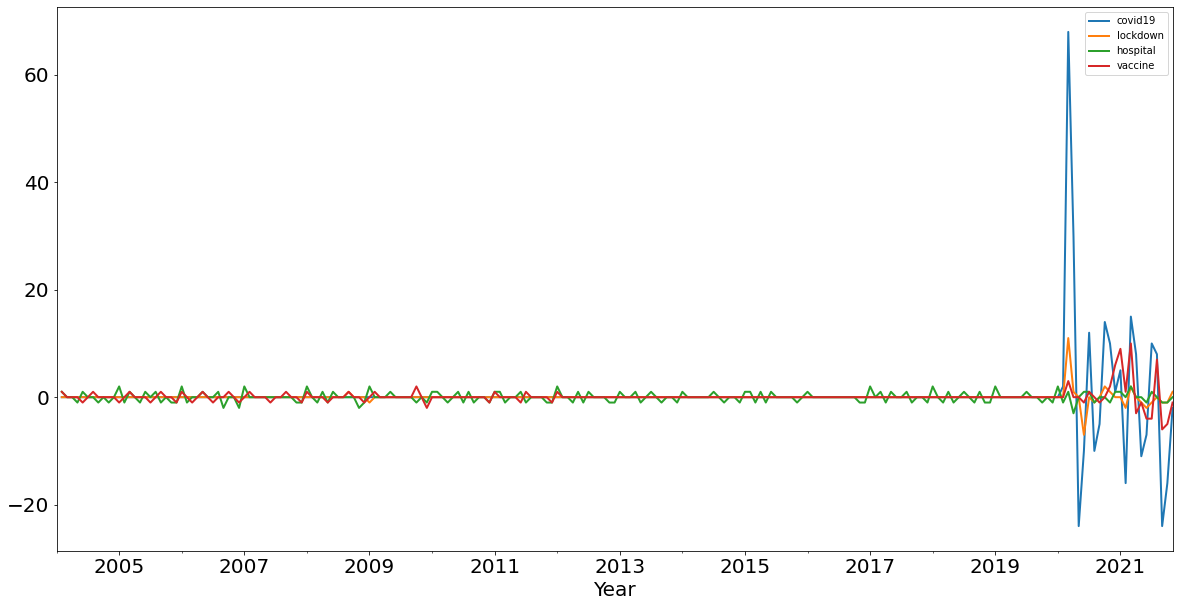

In [34]:
df.diff().plot(figsize=(20,10),linewidth=2,fontsize=20)
plt.xlabel('Year',fontsize=20)